In [1]:
import numpy as np
import pandas
import seaborn as sns
from matplotlib import pyplot as plt
import cv2

In [2]:
img = cv2.imread("./imges/Elzero/download (1).jpeg")
img.shape

(168, 300, 3)

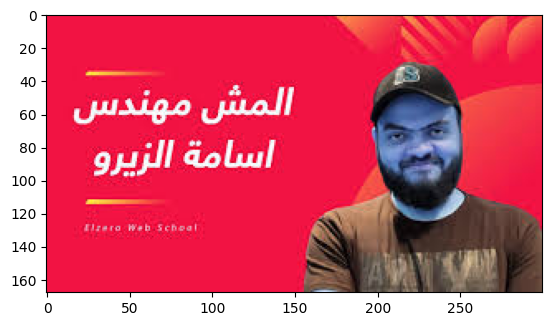

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(168, 300)

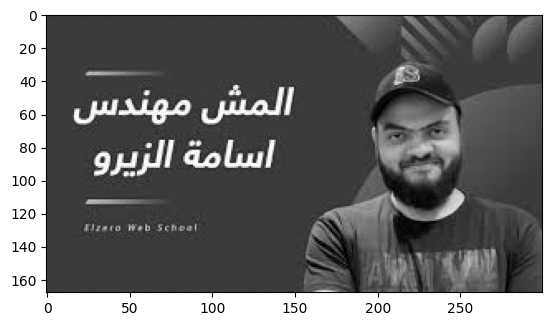

In [5]:
plt.imshow(gray,cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[198,  50,  57,  57]], dtype=int32)

In [7]:
x,y,w,h = faces[0]
x,y,w,h  # the face in point(x,y) and hight = h , width = w

(np.int32(198), np.int32(50), np.int32(57), np.int32(57))

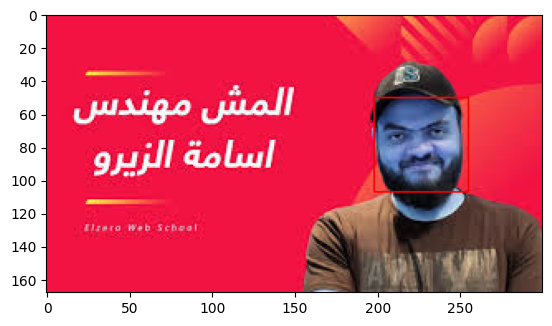

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(250,0,0),1)
plt.imshow(face_img)

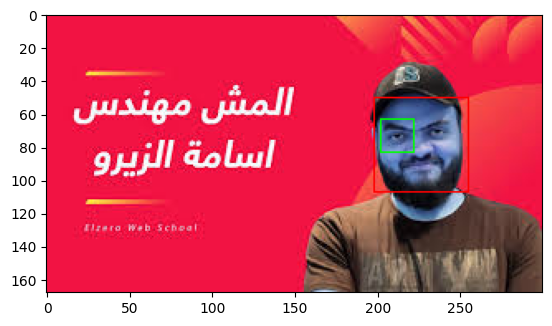

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

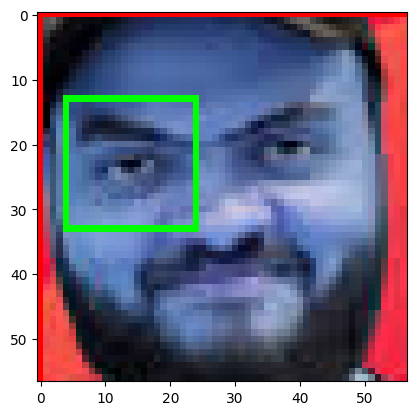

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [11]:
crooped_img = np.array(roi_color)
crooped_img.shape

(57, 57, 3)

In [12]:

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

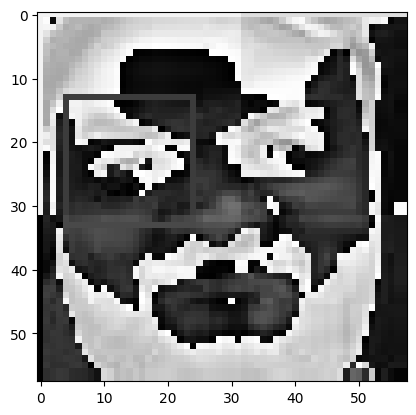

In [13]:
imga = w2d(crooped_img,'db1',5)
plt.imshow(imga ,cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    try:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color
    except:
        pass
    
    

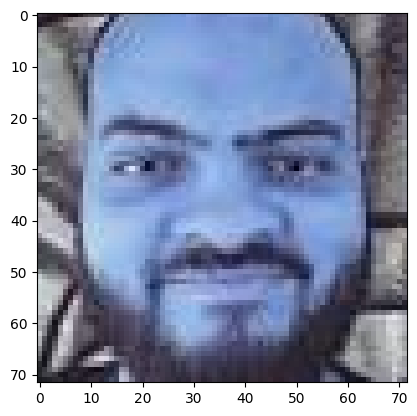

In [15]:
sa = get_cropped_image_if_2_eyes("./imges/Elzero/Elzero__10.jpg")
plt.imshow(sa)

In [34]:
path_to_data = "./imges/"
path_to_cr_data = "./imges/cropped/"

In [35]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [36]:
img_dirs

['./imges/AboTrika',
 './imges/Elneny',
 './imges/Elzero',
 './imges/Salah',
 './imges/yahia']

In [37]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [38]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    print(celebrity_name + "......")
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

AboTrika......
Generating cropped images in folder:  ./imges/cropped/AboTrika
Elneny......
Generating cropped images in folder:  ./imges/cropped/Elneny
Elzero......
Generating cropped images in folder:  ./imges/cropped/Elzero
Salah......
Generating cropped images in folder:  ./imges/cropped/Salah
yahia......
Generating cropped images in folder:  ./imges/cropped/yahia


In [39]:
celebrity_file_names_dict

{'AboTrika': ['./imges/cropped/AboTrika/AboTrika1.png',
  './imges/cropped/AboTrika/AboTrika2.png',
  './imges/cropped/AboTrika/AboTrika3.png',
  './imges/cropped/AboTrika/AboTrika4.png',
  './imges/cropped/AboTrika/AboTrika5.png',
  './imges/cropped/AboTrika/AboTrika6.png',
  './imges/cropped/AboTrika/AboTrika7.png',
  './imges/cropped/AboTrika/AboTrika8.png',
  './imges/cropped/AboTrika/AboTrika9.png',
  './imges/cropped/AboTrika/AboTrika10.png'],
 'Elneny': ['./imges/cropped/Elneny/Elneny1.png',
  './imges/cropped/Elneny/Elneny2.png',
  './imges/cropped/Elneny/Elneny3.png',
  './imges/cropped/Elneny/Elneny4.png',
  './imges/cropped/Elneny/Elneny5.png',
  './imges/cropped/Elneny/Elneny6.png',
  './imges/cropped/Elneny/Elneny7.png',
  './imges/cropped/Elneny/Elneny8.png',
  './imges/cropped/Elneny/Elneny9.png',
  './imges/cropped/Elneny/Elneny10.png',
  './imges/cropped/Elneny/Elneny11.png',
  './imges/cropped/Elneny/Elneny12.png',
  './imges/cropped/Elneny/Elneny13.png',
  './imges/c

In [40]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'AboTrika': 0, 'Elneny': 1, 'Elzero': 2, 'Salah': 3, 'yahia': 4}

In [41]:
X=[]
y =[]

for celebrity_name , training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img = cv2.imread(training_img)
        if img is None:
            continue
        scalled_row_img = cv2.resize(img,(32,32))
        img_har = w2d(img ,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_row_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [42]:
len(X)

57

In [43]:
len(y)

57

In [44]:
X= np.array(X).reshape(len(X) ,4096).astype(float)
X.shape

(57, 4096)

IndexError: invalid index to scalar variable.

In [46]:
X[0]

array([ 25.,  38.,  28., ...,  59., 102., 206.])

## Finally i will train the `Model`

i will use SVM with rbf karnel tuned  with heuristic finetuning

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [48]:
X_train , X_test , y_train , y_test = train_test_split(X,y, random_state=0)

pipe = Pipeline([('scaler',StandardScaler()) ,('svc',SVC(kernel ='rbf' , C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8666666666666667

In [49]:
print(classification_report(y_test ,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.75      1.00      0.86         3
           2       1.00      0.67      0.80         6
           4       0.80      1.00      0.89         4

    accuracy                           0.87        15
   macro avg       0.89      0.92      0.89        15
weighted avg       0.90      0.87      0.86        15



## let do GridSearchCV to find best score

In [50]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [51]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Super-Magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Super-Magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Super-Magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Super-Magic\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  w

,model,best_score,best_params
0,svm,0.855556,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.736111,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.691667,{'logisticregression__C': 1}


In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
best_estimators['svm'].score(X_test,y_test)

0.8

In [54]:
best_estimators['random_forest'].score(X_test,y_test)

0.6666666666666666

In [55]:
best_estimators['logistic_regression'].score(X_test,y_test) 

0.8666666666666667

In [56]:
best_clf = best_estimators['svm']

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[2, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 2, 4, 0],
       [1, 0, 0, 3]])

<Axes: >

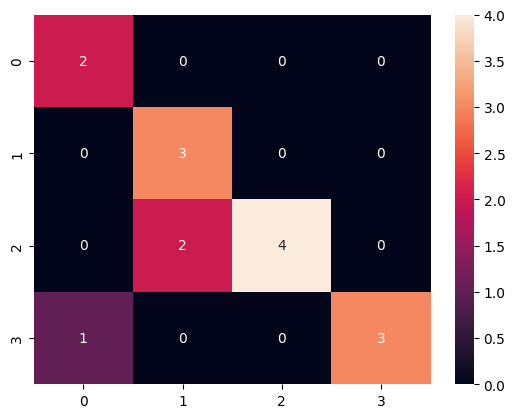

In [58]:
import seaborn as sns
sns.heatmap(cm,annot=True)

# Save model

#### as pickle

In [59]:
import pickle 
with open('model.pickle' , 'wb') as f:
    pickle.dump(best_clf,f)

In [60]:
with open('model.pickle' , 'rb') as f:
    mb =pickle.load(f)

In [61]:
mb.predict(X_test)

array([2, 2, 0, 1, 1, 0, 1, 4, 1, 4, 0, 1, 2, 4, 2])

#### as joblib

In [62]:
import joblib
joblib.dump(best_clf ,"model_joblib.pkl")


['model_joblib.pkl']

In [63]:
with open('model_joblib.pkl' , 'rb') as f:
    mj =joblib.load(f)

In [64]:
mj.predict(X_test)


array([2, 2, 0, 1, 1, 0, 1, 4, 1, 4, 0, 1, 2, 4, 2])

# Save class dictionary

In [65]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))